In [1]:
import torch

In [2]:
import os
os.getcwd()

'/Users/pengchen/repos/d2l-en/d2l-en/pytorch/Neural-Networks-Zero-to-Hero'

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [11]:
b = {}
bi = (0, 1)
b[bi] = b.get(bi, 0) + 1
b[bi] = b.get(bi, 0) + 1
bj = (1, 1)
b[bj] = b.get(bj, 0) + 1
b

{(0, 1): 2, (1, 1): 1}

In [19]:
# sort by counts and descend sort
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [20]:
# how often the second follows the first*

In [21]:
import torch

In [49]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [71]:
N = torch.zeros((27, 27), dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [72]:
itos = {i:s for s,i in stoi.items()}
itos
print(len(itos))

27


(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

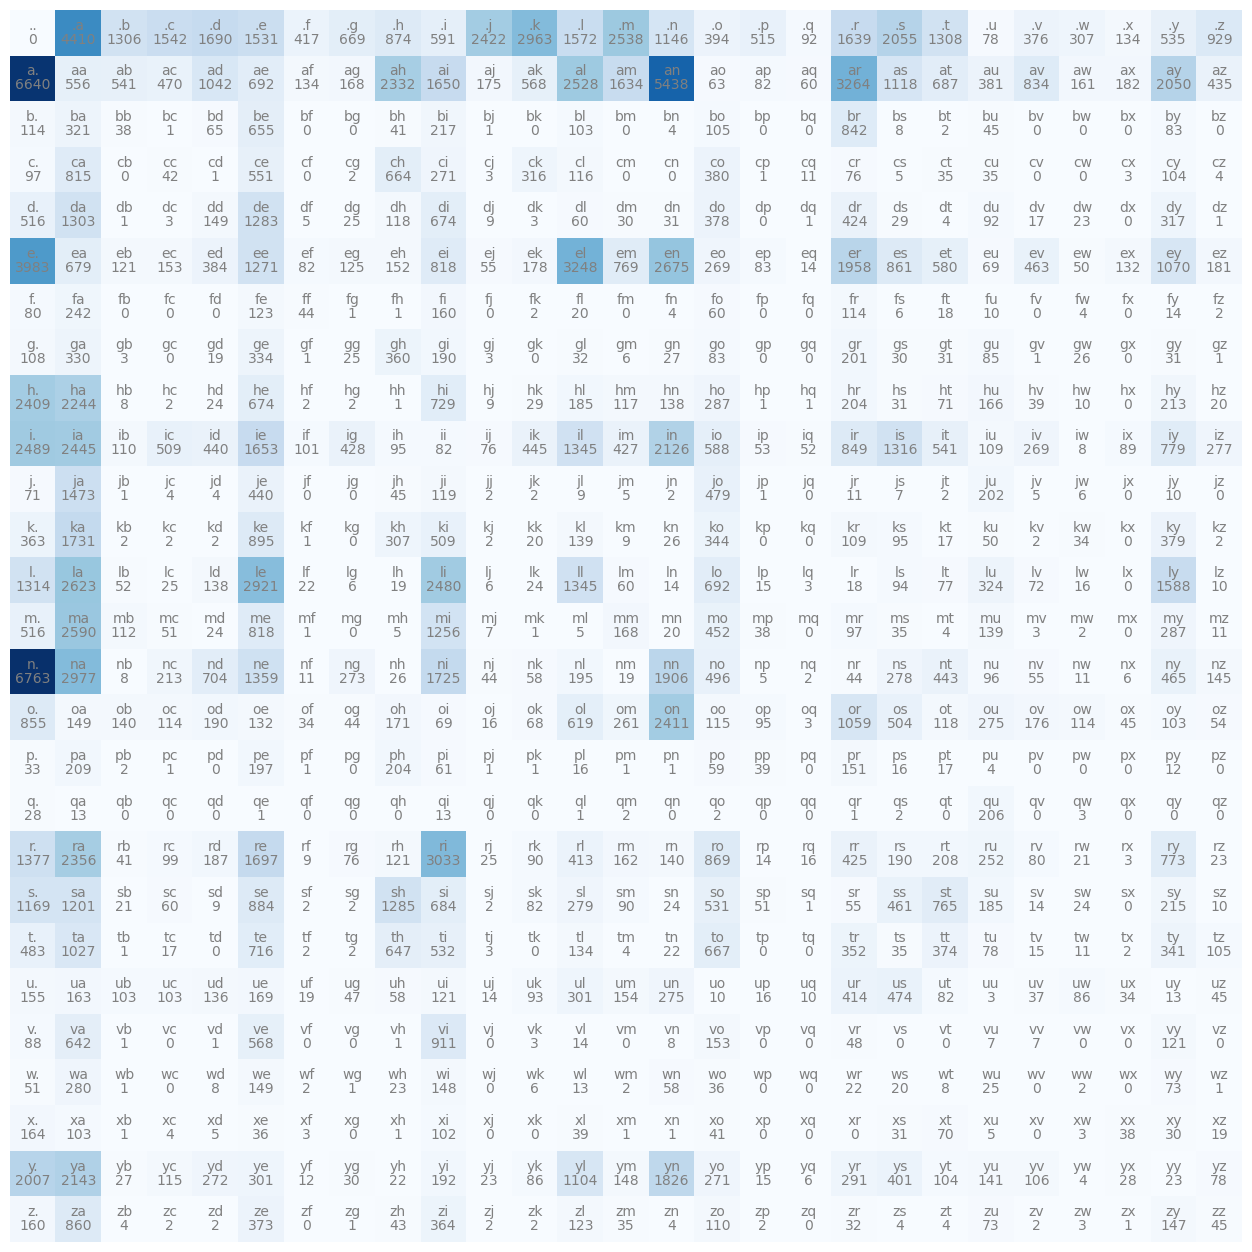

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')


In [80]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [147]:
g = torch.Generator().manual_seed(2147483647)
# 从 logits / probs 里采样 token（语言模型）
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix
itos[ix]

'd'

In [145]:
P = N.float()
# becuase the structure of the data processing in names.txt
# every letter that "enters" the model must "leave" the model.
assert torch.allclose(P.sum(0), P.sum(1))

In [601]:
P = N.float()
# 27, 27
# 27,  1
P /= (P + 2).sum(1, keepdim=True)

# 27, 27
#  1, 27 
# P = P / P.sum(1) ok, but each row is not a valid distribution

In [148]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # 从 logits / probs 里采样 token（语言模型）
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    
    print(''.join(out))


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [156]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(Probability1*Probability2*Probability3) = log(Probability1) + log(Probability2) + log(Probability3)

In [603]:
log_likelihood = 0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        n += 1
        logprob = torch.log(prob)
        log_likelihood += logprob

print(log_likelihood)
nll = (-log_likelihood)/n

print(nll)

tensor(-561297.7500)
tensor(2.4603)


In [172]:
# creates the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [163]:
print(xs)
print(ys)
print(xs)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [173]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

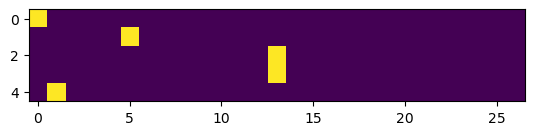

In [165]:
plt.imshow(xenc)

In [166]:
xenc.dtype

torch.float32

In [168]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.3444,  0.0304,  0.1388, -0.4844,  0.1316, -0.4793, -0.4161, -0.1104,
         -0.1948, -0.2398,  1.0328, -0.0286, -0.3474, -0.4696,  1.8114, -0.0652,
          0.1461, -0.2853,  1.1828, -1.0903,  2.5601,  1.2911,  0.5710,  1.5821,
          0.7068, -1.4233,  1.5485],
        [-1.0681,  1.7548, -1.1371,  2.0408,  0.0560, -0.7852,  0.5432, -1.3070,
         -1.9568, -0.5479, -0.9329, -1.4867,  0.3719, -0.0081, -0.2375, -1.7245,
          0.4026,  0.0490,  0.5483,  0.5362, -0.1864,  0.4714, -0.4124, -0.5786,
         -1.4629,  0.9309, -0.1943],
        [ 0.5281,  0.1411, -1.1072,  0.1541,  0.8277, -0.9154,  1.5368, -0.7387,
         -0.1560, -0.5350,  1.1069, -0.6196,  0.0474, -0.5156,  0.9087,  0.0550,
         -0.0799,  0.1575, -0.6873,  0.2368,  0.5259, -0.3986,  1.0051, -0.8273,
         -0.1176, -0.6459, -1.9707],
        [ 0.5281,  0.1411, -1.1072,  0.1541,  0.8277, -0.9154,  1.5368, -0.7387,
         -0.1560, -0.5350,  1.1069, -0.6196,  0.0474, -0.5156,  0.9087,  0.0550

In [174]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [175]:
probs.shape

torch.Size([5, 27])

In [178]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # output character index
    print('-------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('==================')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())
    

-------------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.012286250479519367
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
-------------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct charac

In [179]:
# ------------------- !!! OPTIMIZATION !!! yay ------------------------

In [187]:
xs

tensor([ 0,  5, 13, 13,  1])

In [188]:
ys

tensor([ 5, 13, 13,  1,  0])

In [189]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [580]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()
print(f'loss: {loss}')
print(f'interesting probs: {probs[torch.arange(5), ys]}')

loss: 0.5604656934738159
interesting probs: tensor([0.7142, 0.7262, 0.4005, 0.4097, 0.7129], grad_fn=<IndexBackward0>)


In [581]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [582]:
W.data += -0.5 * W.grad

In [614]:
# creates the training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [615]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # W -> zero, the more smooth distribution you're going achieve, 
    # 0.01 * (W**2).mean() called regularization
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    print(f'loss: {loss.item()}')

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad
    

loss: 3.76861834526062
loss: 3.3788065910339355
loss: 3.161090850830078
loss: 3.0271859169006348
loss: 2.9344840049743652
loss: 2.867231607437134
loss: 2.8166542053222656
loss: 2.777146339416504
loss: 2.7452542781829834
loss: 2.7188305854797363
loss: 2.696505546569824
loss: 2.6773719787597656
loss: 2.6608054637908936
loss: 2.6463515758514404
loss: 2.633664846420288
loss: 2.622471570968628
loss: 2.6125476360321045
loss: 2.6037068367004395
loss: 2.595794439315796
loss: 2.5886809825897217
loss: 2.5822560787200928
loss: 2.5764293670654297
loss: 2.5711236000061035
loss: 2.566272735595703
loss: 2.5618228912353516
loss: 2.5577263832092285
loss: 2.5539441108703613
loss: 2.550442695617676
loss: 2.5471930503845215
loss: 2.5441696643829346
loss: 2.5413525104522705
loss: 2.538722038269043
loss: 2.536262035369873
loss: 2.5339579582214355
loss: 2.5317976474761963
loss: 2.5297679901123047
loss: 2.527859926223755
loss: 2.5260636806488037
loss: 2.5243709087371826
loss: 2.522773027420044
loss: 2.5212640

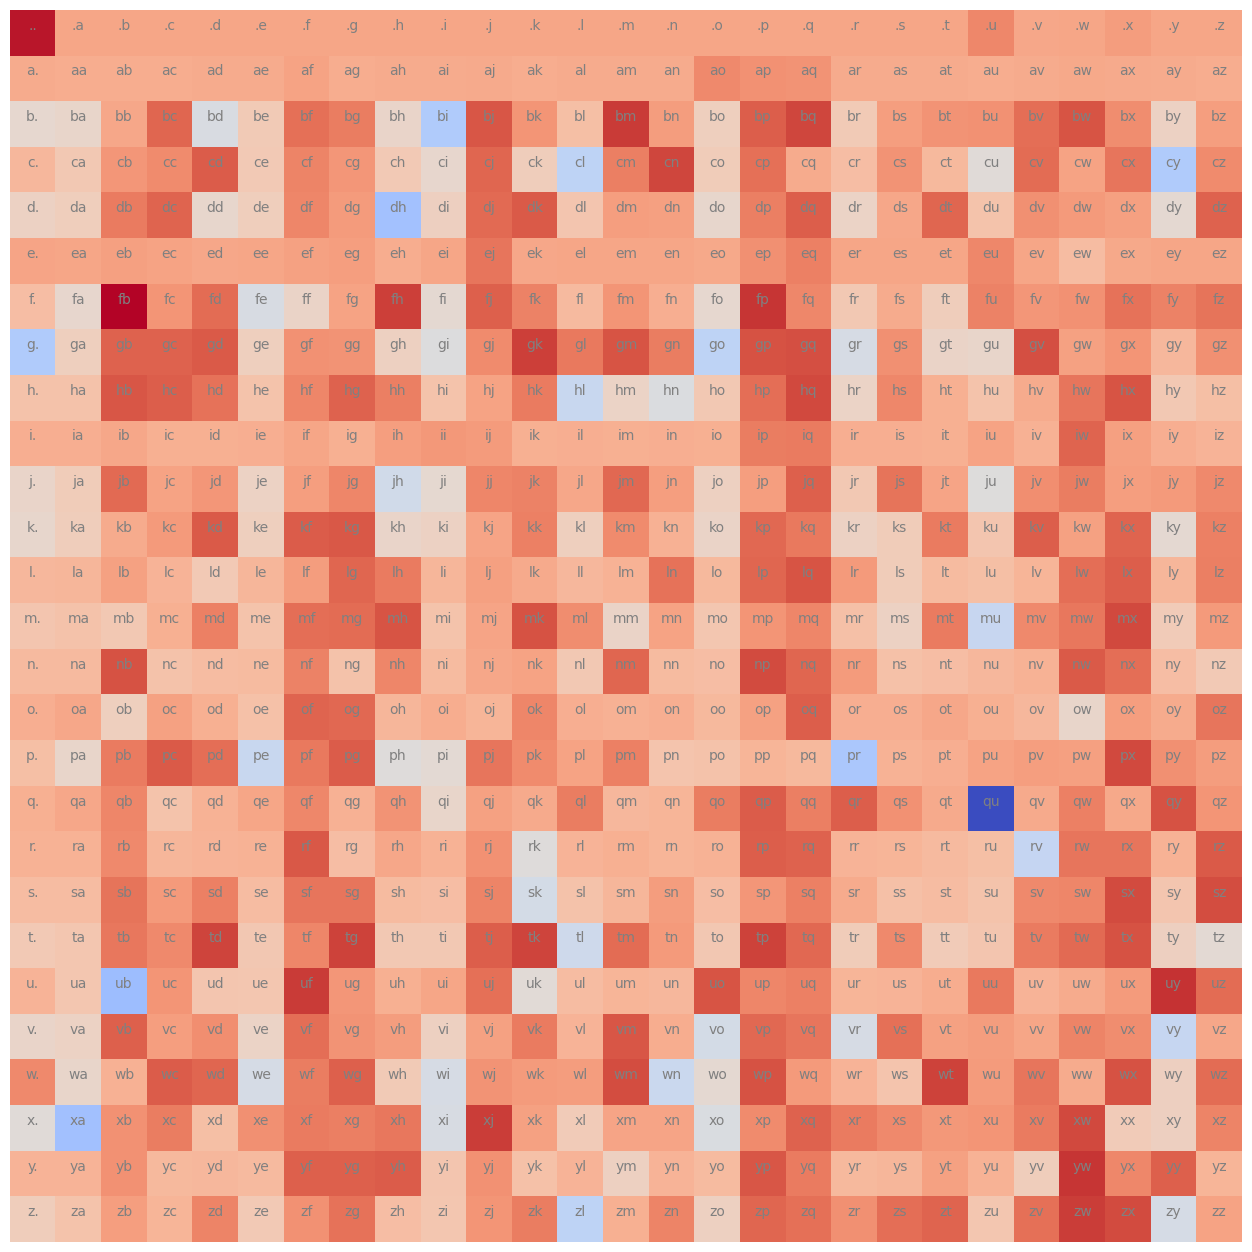

In [616]:
import matplotlib.pyplot as plt
import torch

# Ensure your gradients exist before plotting
# (You must have run loss.backward() previously)

plt.figure(figsize=(16, 16))

# 1. Plot W.grad (detach ensures it plays nice with matplotlib)
# We use 'coolwarm' because gradients can be positive (Red) or negative (Blue)
plt.imshow(W.grad.detach().numpy(), cmap='coolwarm') 

for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        
        # 2. Get the gradient value
        grad_val = W.grad[i, j].item()
        
        # 3. Print formatted float (.4f) so it fits in the box
        # plt.text(j, i, f'{grad_val:.4f}', ha="center", va="top", color='black')

plt.axis('off')
plt.show()


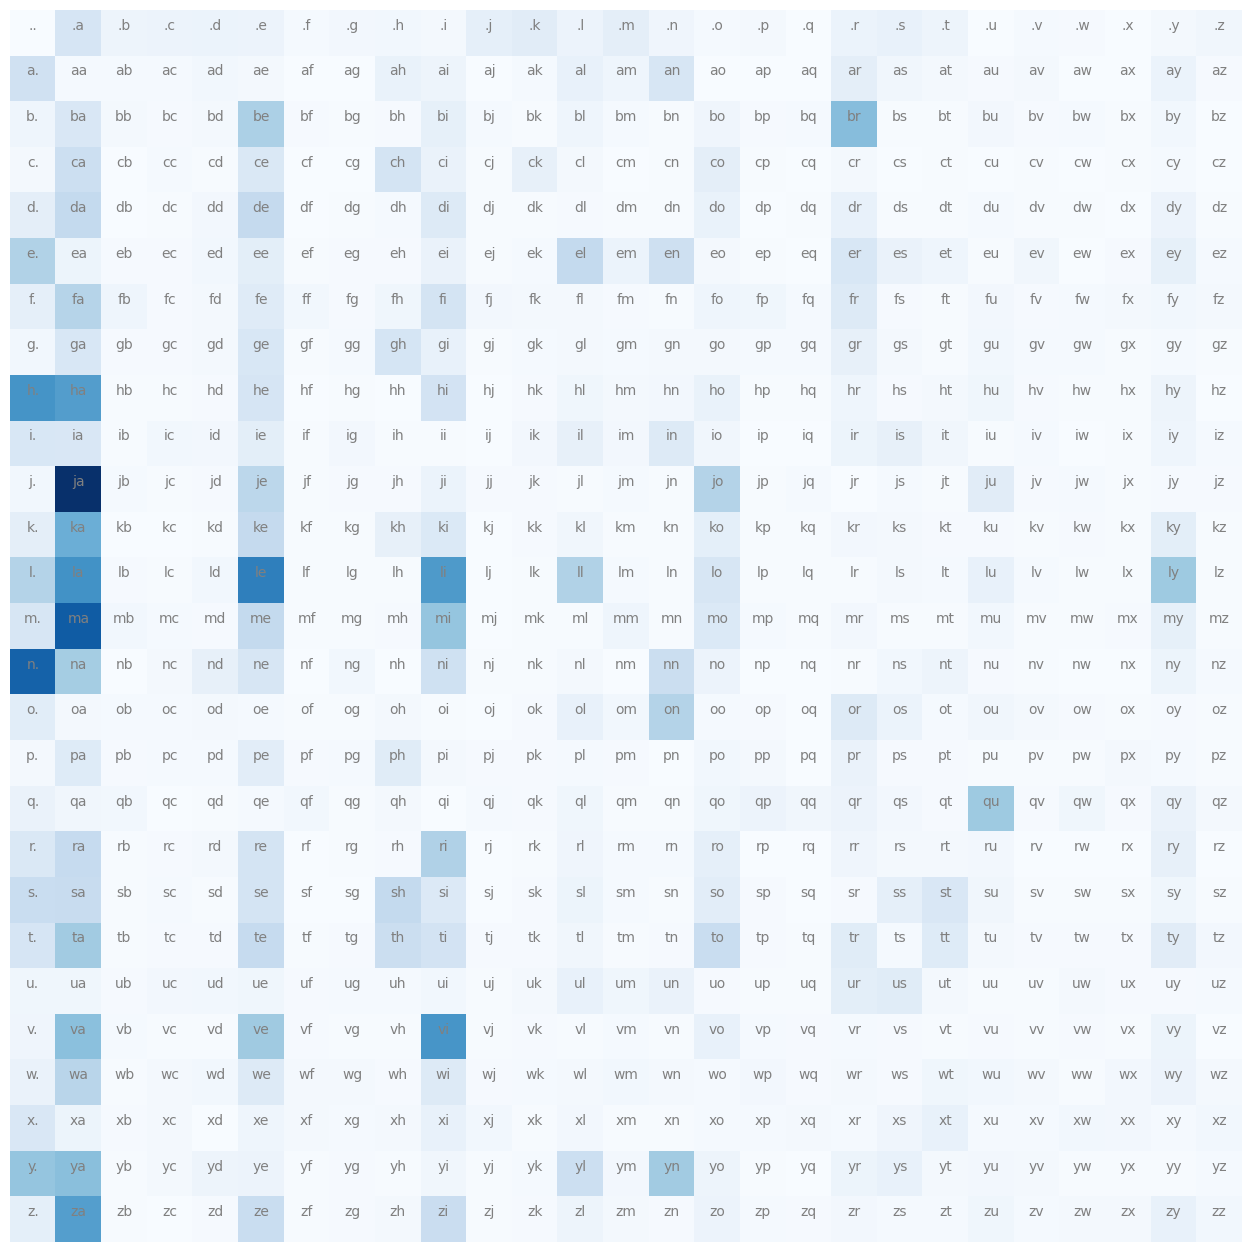

In [617]:
import matplotlib.pyplot as plt
import torch

# Ensure your gradients exist before plotting
# (You must have run loss.backward() previously)
W_exp = W.exp()

plt.figure(figsize=(16, 16))

# 1. Plot W.grad (detach ensures it plays nice with matplotlib)
# We use 'coolwarm' because gradients can be positive (Red) or negative (Blue)
plt.imshow(W_exp.data.detach().numpy(), cmap='Blues') 

for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        
        # 2. Get the gradient value
        grad_val = W_exp.data[i, j].item()
        
        # 3. Print formatted float (.4f) so it fits in the box
        # plt.text(j, i, f'{grad_val:.4f}', ha="center", va="top", color='black')

plt.axis('off')
plt.show()


In [606]:
import torch.nn.functional as F

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        # ---------- CHANGE START ----------
        
        # 1. Turn the integer index 'ix' into a Tensor
        x = torch.tensor([ix])
        
        # 2. One-hot encode the input (creates shape 1x27)
        # We must cast to .float() because W is float, but one_hot creates integers
        xenc = F.one_hot(x, num_classes=27).float()
        
        # 3. Forward Pass: Calculate Logits
        logits = xenc @ W 
        
        # 4. Softmax: Convert Logits to Probabilities
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        
        # ---------- CHANGE END ----------
        
        # 5. Sample from the distribution (Same as before)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    
    print(''.join(out))


cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyauelalerigotai.
moliellavo.
ke.
teda.
ka.
emim.
sade.
enkaviyny.
fobspehinivenvtahlasu.
dsor.
br.
jol.
pyawaisan.
ja.
